In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 1s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
decode_index = 10

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[decode_index]])

557056/550378 [==============================] - 1s 1us/step


In [8]:
decoded_newswire

'?periodendeddecember31shrprofit11ctsvsloss24ctsnetprofit224271vsloss511349revs7258688vs7200349reuter3'

In [11]:
len(train_data)

8982

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
y_train = vectorize_sequences(train_labels)

In [21]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [24]:

one_hot_train_labels = to_one_hot(train_labels)

In [25]:
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
from keras import models

In [27]:
from keras import layers

In [28]:
model = models.Sequential()

In [29]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

In [30]:
model.add(layers.Dense(64, activation='relu'))

In [31]:
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [34]:
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 302us/step - loss: 2.5574 - accuracy: 0.5549 - val_loss: 1.7019 - val_accuracy: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.3843 - accuracy: 0.7072 - val_loss: 1.2845 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0179 - accuracy: 0.7845 - val_loss: 1.1115 - val_accuracy: 0.7740
Epoch 4/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.7892 - accuracy: 0.8341 - val_loss: 1.0042 - val_accuracy: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.6227 - accuracy: 0.8682 - val_loss: 0.9567 - val_accuracy: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.4929 - accuracy: 0.8999 - val_loss: 0.9166 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss

In [36]:
import matplotlib.pyplot as plt

In [37]:
loss = history.history['loss']

In [38]:
len(loss)

20

In [39]:
loss[0]

2.557395751779165

In [40]:
val_loss = history.history['val_loss']

In [42]:
epochs = range(1, len(loss)+1)

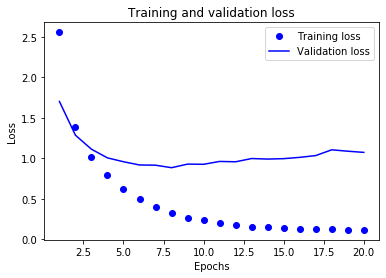

In [44]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 239us/step - loss: 1.9686 - accuracy: 0.5864 - val_loss: 1.2388 - val_accuracy: 0.7060
Epoch 2/9
7982/7982 [==============================] - 2s 210us/step - loss: 0.9664 - accuracy: 0.7854 - val_loss: 1.0341 - val_accuracy: 0.7820
Epoch 3/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.6270 - accuracy: 0.8677 - val_loss: 0.9225 - val_accuracy: 0.7990
Epoch 4/9
7982/7982 [==============================] - 2s 212us/step - loss: 0.4245 - accuracy: 0.9070 - val_loss: 0.8671 - val_accuracy: 0.8180
Epoch 5/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.2977 - accuracy: 0.9327 - val_loss: 0.8426 - val_accuracy: 0.8270
Epoch 6/9
7982/7982 [==============================] - 2s 202us/step - loss: 0.2504 - accuracy: 0.9395 - val_loss: 0.8530 - val_accuracy: 0.8330
Epoch 7/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.189